In [1]:
import pandas as pd

# Load the Excel dataset
file_path = '/content/Simulated_Operational_Risk_Data...xlsx'
df = pd.read_excel(file_path)

# Encoding categorical variable"Resolved" to numerical
df['Resolved'] = df['Resolved'].replace({'Yes': 1, 'No': 2})

# Encoding categorical variable"Control_Weakness" to numerical
df['Control_Weakness'] = df['Control_Weakness'].replace({'Yes': 1, 'No': 2})

# Assign numerical symbols to "Business_Line" and "Sub_Category"
business_line_mapping = {business_line: i for i, business_line in enumerate(df['Business_Line'].unique())}
df['Business_Line_Encoded'] = df['Business_Line'].map(business_line_mapping)

sub_category_mapping = {sub_category: i for i, sub_category in enumerate(df['Sub_Category'].unique())}
df['Sub_Category_Encoded'] = df['Sub_Category'].map(sub_category_mapping)

# Quick look at the data
print("Shape of dataset:", df.shape)
print("Column names:", df.columns.tolist())
df.head()

Shape of dataset: (200, 18)
Column names: ['Event_ID', 'Business_Line', 'Sub_Category', 'Loss_Amount', 'Event_Date', 'Discovery_Date', 'Resolved', 'Risk_Rating', 'Control_Weakness', 'Internal_fraud', 'External_fraud', 'Employ_PWS', 'Clients_PBP', 'Disaster', 'ICT_Failure', 'Execution_DP', 'Business_Line_Encoded', 'Sub_Category_Encoded']


<ipython-input-1-07192982797c>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Resolved'] = df['Resolved'].replace({'Yes': 1, 'No': 2})
<ipython-input-1-07192982797c>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Control_Weakness'] = df['Control_Weakness'].replace({'Yes': 1, 'No': 2})


,Event_ID,Business_Line,Sub_Category,Loss_Amount,Event_Date,Discovery_Date,Resolved,Risk_Rating,Control_Weakness,Internal_fraud,External_fraud,Employ_PWS,Clients_PBP,Disaster,ICT_Failure,Execution_DP,Business_Line_Encoded,Sub_Category_Encoded
0,EVT1000,Asset Management,Real Asset Management,6024,2022-05-10,2022-07-31,2,6,2,619,1240,309,1507,201,60,2088,0,0
1,EVT1001,Corporate Finance,Berue De Exchange,71904,2019-12-11,2020-01-12,1,6,1,2385,25168,16271,11717,7312,522,8529,1,1
2,EVT1002,Commercial Banking,Micro-finance,26887,2015-01-03,2015-03-24,2,3,1,3400,3455,5422,5124,1609,994,6883,2,2
3,EVT1003,Funeral Services,Funeral Services,24723,2015-08-10,2015-10-27,2,7,1,3782,7391,6949,1247,1591,291,3472,3,3
4,EVT1004,Corporate Finance,Berue De Exchange,34374,2017-03-19,2017-04-13,1,3,2,1058,11962,4365,7043,850,133,8963,1,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Drop any rows with missing values
df.dropna(inplace=True)

# Defining the target variable in a column named Loss_Amount
target_col = 'Loss_Amount'
# Select only numerical features for scaling, excluding date and ID columns
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
numerical_features = [f for f in numerical_features if f not in [target_col, 'Event_ID']]
X = df[numerical_features]
y = df[target_col]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y.values, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (160, 12)
Test set shape: (40, 12)


In [3]:
import tensorflow as tf
from tensorflow.keras import layers

# Define a simple neural network model for regression
def create_bnn_model(input_dim):
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(input_dim,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)  # Output: Operational risk loss
    ])
    return model

input_dim = X_train.shape[1]
model = create_bnn_model(input_dim)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497 (1.94 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import numpy as np

# Log-prior: Assume standard Gaussian prior over weights
def log_prior(theta):
    return -0.5 * np.sum(theta**2)

# Log-likelihood: Assuming Gaussian likelihood for regression
def log_likelihood(theta, X, y):
    preds = X @ theta
    residual = y - preds
    return -0.5 * np.sum(residual ** 2)

# Full log-posterior
def log_posterior(theta, X, y):
    return log_prior(theta) + log_likelihood(theta, X, y)

# Gradient of log-posterior (used in leapfrog)
def grad_log_posterior(theta, X, y):
    preds = X @ theta
    grad_likelihood = X.T @ (y - preds)
    grad_prior = -theta
    return grad_likelihood + grad_prior

# Leapfrog integrator
def leapfrog(theta, r, step_size, num_steps, X, y):
    theta_new = theta.copy()
    r_new = r.copy()

    r_new += 0.5 * step_size * grad_log_posterior(theta_new, X, y)
    for _ in range(num_steps - 1):
        theta_new += step_size * r_new
        r_new += step_size * grad_log_posterior(theta_new, X, y)
    theta_new += step_size * r_new
    r_new += 0.5 * step_size * grad_log_posterior(theta_new, X, y)
    return theta_new, r_new

# Basic HMC Sampler
def hmc_sampler(
    initial_theta, X, y, num_samples=500, step_size=0.01, num_steps=20, mass=1.0
):
    samples = []
    theta = initial_theta.copy()
    dim = len(initial_theta)

    for i in range(num_samples):
        r0 = np.random.normal(0, np.sqrt(mass), size=dim)
        theta_prop, r_prop = leapfrog(theta, r0, step_size, num_steps, X, y)

        # Compute energies
        current_U = -log_posterior(theta, X, y)
        current_K = 0.5 * np.sum(r0**2)

        proposed_U = -log_posterior(theta_prop, X, y)
        proposed_K = 0.5 * np.sum(r_prop**2)

        # Metropolis-Hastings acceptance
        accept_prob = np.exp((current_U + current_K) - (proposed_U + proposed_K))
        if np.random.rand() < accept_prob:
            theta = theta_prop

        samples.append(theta.copy())

        if i % 50 == 0:
            print(f"Sample {i}, Acceptance Probability: {accept_prob:.3f}")

    return np.array(samples)

In [7]:
# Select small subset of weights (e.g., linear regression on first layer)
X_subset = X_train
y_subset = y_train

# Initialize parameters (weights) randomly
initial_theta = np.random.randn(X_subset.shape[1])

# Run HMC
samples_hmc = hmc_sampler(initial_theta, X_subset, y_subset, num_samples=5000)

Sample 0, Acceptance Probability: inf
Sample 50, Acceptance Probability: inf
Sample 100, Acceptance Probability: inf
Sample 150, Acceptance Probability: inf
Sample 200, Acceptance Probability: inf
Sample 250, Acceptance Probability: inf
Sample 300, Acceptance Probability: inf
Sample 350, Acceptance Probability: inf
Sample 400, Acceptance Probability: inf
Sample 450, Acceptance Probability: inf


<ipython-input-4-f79763c93c29>:57: RuntimeWarning: overflow encountered in exp
  accept_prob = np.exp((current_U + current_K) - (proposed_U + proposed_K))


In [8]:
import tensorflow as tf

# Flatten model weights into a 1D vector
def flatten_weights(model):
    weights = model.get_weights()
    return np.concatenate([w.flatten() for w in weights])

# Unflatten a vector back into model weights (matching model structure)
def unflatten_weights(model, flat_weights):
    shapes = [w.shape for w in model.get_weights()]
    new_weights = []
    idx = 0
    for shape in shapes:
        size = np.prod(shape)
        new_weights.append(flat_weights[idx:idx+size].reshape(shape))
        idx += size
    return new_weights

In [9]:
# Log-likelihood for neural net: uses model predictions
def nn_log_likelihood(theta, model, X, y):
    model.set_weights(unflatten_weights(model, theta))
    preds = model.predict(X, verbose=0).flatten()
    return -0.5 * np.sum((y - preds)**2)

# Gradient via backpropagation using TensorFlow
def nn_grad_log_likelihood(theta, model, X, y):
    model.set_weights(unflatten_weights(model, theta))

    with tf.GradientTape() as tape:
        inputs = tf.convert_to_tensor(X, dtype=tf.float32)
        targets = tf.convert_to_tensor(y, dtype=tf.float32)
        preds = tf.squeeze(model(inputs, training=False))
        loss = tf.reduce_mean((targets - preds)**2)

    grads = tape.gradient(loss, model.trainable_variables)
    grads = [g.numpy().flatten() for g in grads]
    grads = np.concatenate(grads)
    return -grads  # negative for log-likelihood gradient

In [10]:
# Setup
bnn_model = create_bnn_model(X_train.shape[1])
theta0 = flatten_weights(bnn_model)

# New versions for HMC using NN
def nn_log_posterior(theta, model, X, y):
    return -0.5 * np.sum(theta**2) + nn_log_likelihood(theta, model, X, y)

def nn_grad_log_posterior(theta, model, X, y):
    return -theta + nn_grad_log_likelihood(theta, model, X, y)

# Leapfrog for neural nets
def leapfrog_nn(theta, r, step_size, num_steps, model, X, y):
    theta_new = theta.copy()
    r_new = r.copy()

    r_new += 0.5 * step_size * nn_grad_log_posterior(theta_new, model, X, y)
    for _ in range(num_steps - 1):
        theta_new += step_size * r_new
        r_new += step_size * nn_grad_log_posterior(theta_new, model, X, y)
    theta_new += step_size * r_new
    r_new += 0.5 * step_size * nn_grad_log_posterior(theta_new, model, X, y)
    return theta_new, r_new

# Full HMC sampler for BNN
def hmc_bnn_sampler(initial_theta, model, X, y, num_samples=300, step_size=0.01, num_steps=15):
    samples = []
    theta = initial_theta.copy()
    dim = len(initial_theta)

    for i in range(num_samples):
        r0 = np.random.normal(0, 1, size=dim)
        theta_prop, r_prop = leapfrog_nn(theta, r0, step_size, num_steps, model, X, y)

        # Compute energy terms
        current_U = -nn_log_posterior(theta, model, X, y)
        current_K = 0.5 * np.sum(r0**2)
        proposed_U = -nn_log_posterior(theta_prop, model, X, y)
        proposed_K = 0.5 * np.sum(r_prop**2)

        # Metropolis acceptance
        accept_prob = np.exp((current_U + current_K) - (proposed_U + proposed_K))
        if np.random.rand() < accept_prob:
            theta = theta_prop

        samples.append(theta.copy())
        if i % 50 == 0:
            print(f"HMC Sample {i} | Acceptance Prob: {accept_prob:.3f}")

    return np.array(samples)

In [11]:
theta_init = flatten_weights(bnn_model)
samples = hmc_bnn_sampler(theta_init, bnn_model, X_train, y_train, num_samples=5000)

HMC Sample 0 | Acceptance Prob: nan


<ipython-input-10-605b112c6043>:7: RuntimeWarning: overflow encountered in square
  return -0.5 * np.sum(theta**2) + nn_log_likelihood(theta, model, X, y)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


HMC Sample 50 | Acceptance Prob: nan
HMC Sample 100 | Acceptance Prob: 0.000
HMC Sample 150 | Acceptance Prob: nan
HMC Sample 200 | Acceptance Prob: nan
HMC Sample 250 | Acceptance Prob: 0.000


In [12]:
import numpy as np

def sghmc_sampler(
    initial_theta, model, X, y, batch_size=64,
    num_samples=300, step_size=0.01, alpha=0.01, beta=0.01, noise_std=0.01
):
    theta = initial_theta.copy()
    dim = len(initial_theta)
    samples = []

    # Velocity initialization
    velocity = np.zeros(dim)

    for i in range(num_samples):
        # Sample a minibatch
        indices = np.random.choice(len(X), size=batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]

        # Compute stochastic gradient of log-posterior
        grad = nn_grad_log_posterior(theta, model, X_batch, y_batch)

        # Inject noise and friction (SGHMC core step)
        noise = np.random.normal(0, noise_std, size=dim)
        velocity = (1 - alpha) * velocity + step_size * grad + np.sqrt(2 * beta * step_size) * noise
        theta += velocity

        samples.append(theta.copy())

        if i % 50 == 0:
            print(f"SGHMC Sample {i}")

    return np.array(samples)

In [13]:
# Start from the same model
theta_init_sghmc = flatten_weights(bnn_model)

# Run SGHMC
samples_sghmc = sghmc_sampler(theta_init_sghmc, bnn_model, X_train, y_train, num_samples=5000)

SGHMC Sample 0
SGHMC Sample 50
SGHMC Sample 100
SGHMC Sample 150
SGHMC Sample 200
SGHMC Sample 250


In [14]:
def predict_from_samples(samples, model, X):
    preds = []
    for i, theta in enumerate(samples):
        model.set_weights(unflatten_weights(model, theta))
        pred = model.predict(X, verbose=0).flatten()
        preds.append(pred)
    return np.array(preds)  # Shape: (n_samples, n_points)

In [15]:
# HMC Predictions
preds_hmc = predict_from_samples(samples[:100], bnn_model, X_test)
mean_hmc = np.mean(preds_hmc, axis=0)
std_hmc = np.std(preds_hmc, axis=0)

# SGHMC Predictions
preds_sghmc = predict_from_samples(samples_sghmc[:100], bnn_model, X_test)
mean_sghmc = np.mean(preds_sghmc, axis=0)
std_sghmc = np.std(preds_sghmc, axis=0)

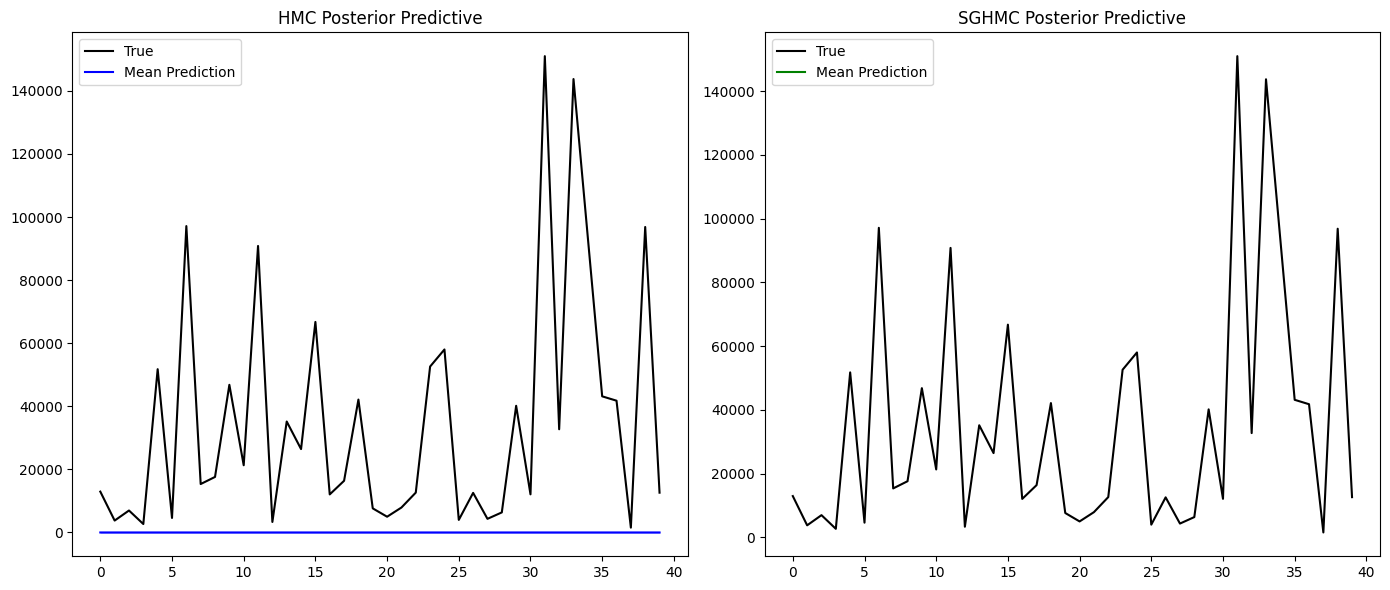

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# HMC
plt.subplot(1, 2, 1)
plt.title("HMC Posterior Predictive")
plt.plot(y_test, label='True', color='black')
plt.plot(mean_hmc, label='Mean Prediction', color='blue')
plt.fill_between(range(len(mean_hmc)), mean_hmc - std_hmc, mean_hmc + std_hmc, color='blue', alpha=0.3)
plt.legend()

# SGHMC
plt.subplot(1, 2, 2)
plt.title("SGHMC Posterior Predictive")
plt.plot(y_test, label='True', color='black')
plt.plot(mean_sghmc, label='Mean Prediction', color='green')
plt.fill_between(range(len(mean_sghmc)), mean_sghmc - std_sghmc, mean_sghmc + std_sghmc, color='green', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# Linear regression model: y = Xw + noise
def linear_model(X, theta):
    return X @ theta


In [18]:
#Log Posterior and Gradient
def log_posterior(theta, X, y):
    pred = linear_model(X, theta)
    log_likelihood = -0.5 * np.sum((y - pred) ** 2)
    log_prior = -0.5 * np.sum(theta ** 2)
    return log_likelihood + log_prior

def grad_log_posterior(theta, X, y):
    pred = linear_model(X, theta)
    grad = X.T @ (y - pred) - theta
    return grad

In [19]:
#Utility: Leapfrog Step
def leapfrog(theta, r, step_size, X, y):
    r_half = r + 0.5 * step_size * grad_log_posterior(theta, X, y)
    theta_new = theta + step_size * r_half
    r_new = r_half + 0.5 * step_size * grad_log_posterior(theta_new, X, y)
    return theta_new, r_new

In [20]:
#NUTS Core Logic
def nuts_sampler(theta0, X, y, num_samples=5000, step_size=0.1, max_depth=5):
    D = len(theta0)
    samples = []
    theta = theta0.copy()

    def kinetic_energy(r): return 0.5 * np.sum(r ** 2)
    def h(theta, r): return -log_posterior(theta, X, y) + kinetic_energy(r)

    for i in range(num_samples):
        r0 = np.random.randn(D)
        joint0 = h(theta, r0)
        u = np.random.uniform(0, np.exp(-joint0))

        theta_minus = theta.copy()
        theta_plus = theta.copy()
        r_minus = r0.copy()
        r_plus = r0.copy()
        theta_candidate = theta.copy()
        depth = 0
        n = 1

        while depth < max_depth:
            direction = np.random.choice([-1, 1])
            if direction == -1:
                theta_minus, r_minus, _, _, theta_new, n_new, _ = build_tree(
                    theta_minus, r_minus, u, direction, depth, step_size, theta, r0, X, y
                )
            else:
                _, _, theta_plus, r_plus, theta_new, n_new, _ = build_tree(
                    theta_plus, r_plus, u, direction, depth, step_size, theta, r0, X, y
                )
            if np.random.rand() < n_new / max(n + n_new, 1):
                theta_candidate = theta_new
            n += n_new
            depth += 1
        theta = theta_candidate
        samples.append(theta.copy())
        if i % 50 == 0:
            print(f"NUTS Sample {i}")
    return np.array(samples)

In [21]:
def build_tree(theta, r, u, direction, depth, step_size, theta0, r0, X, y):
    if depth == 0:
        theta_prime, r_prime = leapfrog(theta, r, direction * step_size, X, y)
        joint = -log_posterior(theta_prime, X, y) + 0.5 * np.sum(r_prime ** 2)
        n_prime = int(u < np.exp(-joint))
        s_prime = int(u < np.exp(100 - joint))  # stay condition
        return theta_prime, r_prime, theta_prime, r_prime, theta_prime, n_prime, s_prime
    else:
        theta_m, r_m, theta_p, r_p, theta_prime, n_prime, s_prime = build_tree(
            theta, r, u, direction, depth - 1, step_size, theta0, r0, X, y
        )
        if s_prime == 1:
            if direction == -1:
                theta_m, r_m, _, _, theta_prime2, n_prime2, s_prime2 = build_tree(
                    theta_m, r_m, u, direction, depth - 1, step_size, theta0, r0, X, y
                )
            else:
                _, _, theta_p, r_p, theta_prime2, n_prime2, s_prime2 = build_tree(
                    theta_p, r_p, u, direction, depth - 1, step_size, theta0, r0, X, y
                )
            if np.random.rand() < n_prime2 / max(n_prime + n_prime2, 1):
                theta_prime = theta_prime2
            n_prime += n_prime2
            s_prime = s_prime and s_prime2
        return theta_m, r_m, theta_p, r_p, theta_prime, n_prime, s_prime

In [22]:
# For demo purposes, use small input
X_demo = X_train[:, :3]
y_demo = y_train
theta0 = np.zeros(X_demo.shape[1])

samples_nuts = nuts_sampler(theta0, X_demo, y_demo, num_samples=5000)

NUTS Sample 0
NUTS Sample 50
NUTS Sample 100
NUTS Sample 150
NUTS Sample 200
NUTS Sample 250


In [23]:
# Use mean of NUTS samples to make predictions
theta_nuts_mean = np.mean(samples_nuts, axis=0)

# Use the same features we trained on
X_test_demo = X_test[:, :3]

# Predictive mean
y_pred_nuts = X_test_demo @ theta_nuts_mean

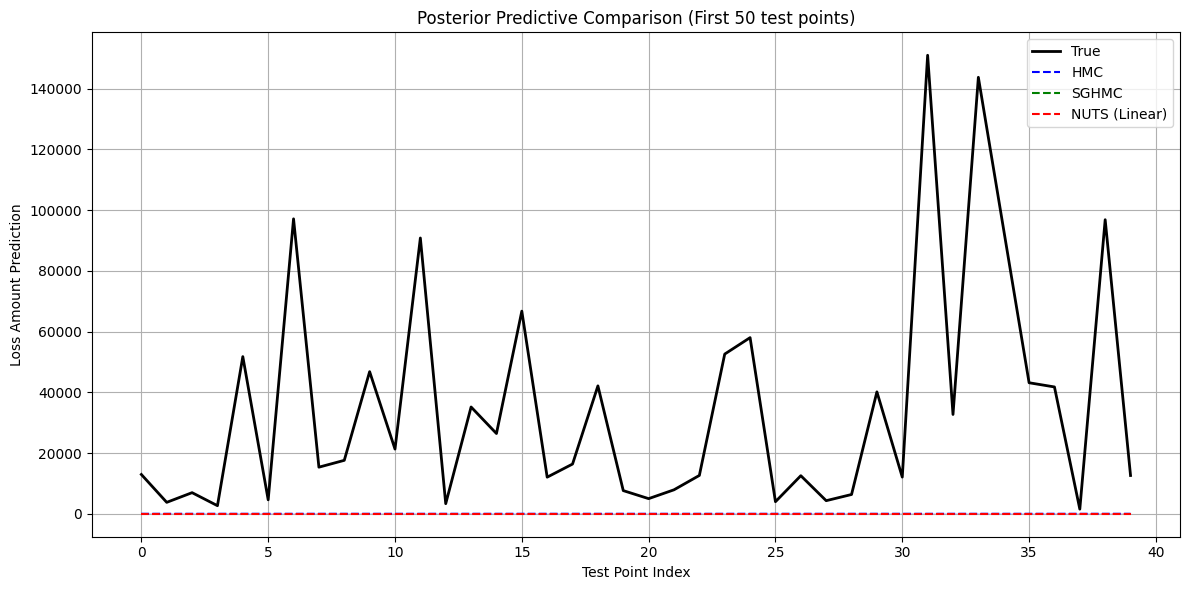

In [24]:
plt.figure(figsize=(12, 6))

plt.plot(y_test[:40], label="True", color="black", linewidth=2) # Changed to 40
plt.plot(mean_hmc[:40], label="HMC", color="blue", linestyle="--") # Changed to 40
plt.plot(mean_sghmc[:40], label="SGHMC", color="green", linestyle="--") # Changed to 40
plt.plot(y_pred_nuts[:40], label="NUTS (Linear)", color="red", linestyle="--") # Changed to 40

plt.fill_between(range(40), mean_hmc[:40] - std_hmc[:40], mean_hmc[:40] + std_hmc[:40], alpha=0.2, color="blue") # Changed to 40
plt.fill_between(range(40), mean_sghmc[:40] - std_sghmc[:40], mean_sghmc[:40] + std_sghmc[:40], alpha=0.2, color="green") # Changed to 40


plt.title("Posterior Predictive Comparison (First 50 test points)")
plt.xlabel("Test Point Index")
plt.ylabel("Loss Amount Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
def magnetic_leapfrog(theta, r, step_size, X, y, B):
    # Step 1: Rotate momentum due to magnetic field
    r = r + 0.5 * step_size * grad_log_posterior(theta, X, y)
    r = r + step_size * (B @ r)

    # Step 2: Update position
    theta = theta + step_size * r

    # Step 3: Apply magnetic field again
    r = r + step_size * (B @ r)
    r = r + 0.5 * step_size * grad_log_posterior(theta, X, y)

    return theta, r

In [26]:
def mhmc_sampler(theta0, X, y, num_samples=5000, step_size=0.05, num_steps=20):
    D = len(theta0)
    samples = []
    theta = theta0.copy()

    # Define a skew-symmetric matrix B to simulate the magnetic field
    B = np.zeros((D, D))
    for i in range(D - 1):
        B[i, i+1] = 1
        B[i+1, i] = -1

    for i in range(num_samples):
        r0 = np.random.randn(D)
        current_theta = theta.copy()
        current_r = r0.copy()

        # Simulate dynamics
        theta_new, r_new = current_theta.copy(), current_r.copy()
        for _ in range(num_steps):
            theta_new, r_new = magnetic_leapfrog(theta_new, r_new, step_size, X, y, B)

        # Compute energies
        current_U = -log_posterior(current_theta, X, y)
        current_K = 0.5 * np.sum(current_r ** 2)
        proposed_U = -log_posterior(theta_new, X, y)
        proposed_K = 0.5 * np.sum(r_new ** 2)

        accept_prob = np.exp(current_U - proposed_U + current_K - proposed_K)
        if np.random.rand() < accept_prob:
            theta = theta_new

        samples.append(theta.copy())
        if i % 50 == 0:
            print(f"MHMC Sample {i}")
    return np.array(samples)

In [27]:
# Smaller feature subset to keep computation light
X_demo = X_train[:, :3]
y_demo = y_train
theta0 = np.zeros(X_demo.shape[1])

samples_mhmc = mhmc_sampler(theta0, X_demo, y_demo, num_samples=5000)

MHMC Sample 0
MHMC Sample 50
MHMC Sample 100
MHMC Sample 150
MHMC Sample 200
MHMC Sample 250


In [28]:
theta_mhmc_mean = np.mean(samples_mhmc, axis=0)
X_test_demo = X_test[:, :3]
y_pred_mhmc = X_test_demo @ theta_mhmc_mean

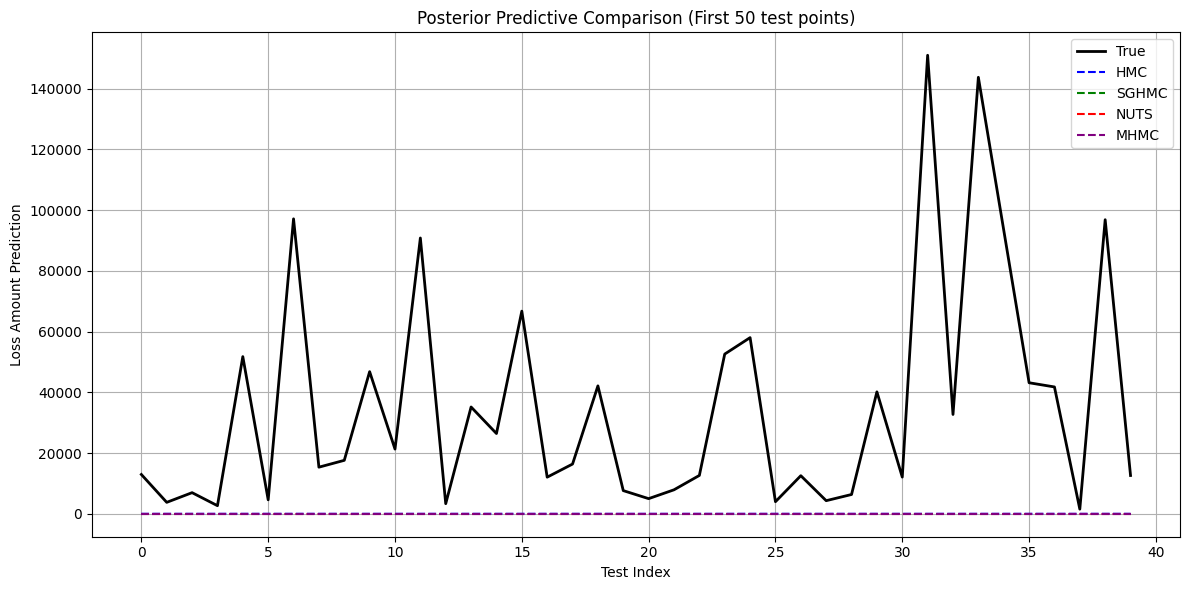

In [29]:
plt.figure(figsize=(12, 6))

plt.plot(y_test[:50], label="True", color="black", linewidth=2)
plt.plot(mean_hmc[:50], label="HMC", color="blue", linestyle="--")
plt.plot(mean_sghmc[:50], label="SGHMC", color="green", linestyle="--")
plt.plot(y_pred_nuts[:50], label="NUTS", color="red", linestyle="--")
plt.plot(y_pred_mhmc[:50], label="MHMC", color="purple", linestyle="--")

plt.title("Posterior Predictive Comparison (First 50 test points)")
plt.xlabel("Test Index")
plt.ylabel("Loss Amount Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
def ahmc_sampler(theta0, X, y, num_samples=5000, step_size=0.01, num_steps=30):
    D = len(theta0)
    samples = []
    theta = theta0.copy()

    # Define leapfrog_antithetic (assuming it's similar to leapfrog)
    def leapfrog_antithetic(theta, r, step_size, X, y, num_steps):
        """
        Leapfrog integration with antithetic sampling.

        This function should perform leapfrog integration, but
        it likely needs modifications for antithetic behavior.

        (This is a placeholder, adapt as needed based on your
         actual leapfrog implementation.)
        """
        for _ in range(num_steps):
            r_half = r + 0.5 * step_size * grad_log_posterior(theta, X, y)
            theta = theta + step_size * r_half
            r = r_half + 0.5 * step_size * grad_log_posterior(theta, X, y)
        return theta, r  # Return updated theta and momentum

    for i in range(num_samples // 2):
        r0 = np.random.randn(D)
        theta_new, r_new = leapfrog_antithetic(theta, r0, step_size, X, y, num_steps)

        # Compute energies
        current_U = -log_posterior(theta, X, y)
        current_K = 0.5 * np.sum(r0 ** 2)
        proposed_U = -log_posterior(theta_new, X, y)
        proposed_K = 0.5 * np.sum(r_new ** 2)

        accept_prob = np.exp(current_U - proposed_U + current_K - proposed_K)
        if np.random.rand() < accept_prob:
            theta = theta_new

        # Save both θ and its antithetic counterpart
        samples.append(theta.copy())

        # Antithetic sample
        r_antithetic = -r0
        theta_anti, _ = leapfrog_antithetic(theta, r_antithetic, step_size, X, y, num_steps)
        samples.append(theta_anti.copy())

        if i % 50 == 0:
            print(f"A-HMC Sample {2*i}/{num_samples}")
    return np.array(samples)


In [31]:
# Use same 3-feature subset as before
X_demo = X_train[:, :3]
y_demo = y_train
theta0 = np.zeros(X_demo.shape[1])

samples_ahmc = ahmc_sampler(theta0, X_demo, y_demo, num_samples=5000)

<ipython-input-30-fe962cb7e840>:33: RuntimeWarning: overflow encountered in exp
  accept_prob = np.exp(current_U - proposed_U + current_K - proposed_K)


A-HMC Sample 0/300
A-HMC Sample 100/300
A-HMC Sample 200/300


In [32]:
theta_ahmc_mean = np.mean(samples_ahmc, axis=0)
y_pred_ahmc = X_test_demo @ theta_ahmc_mean


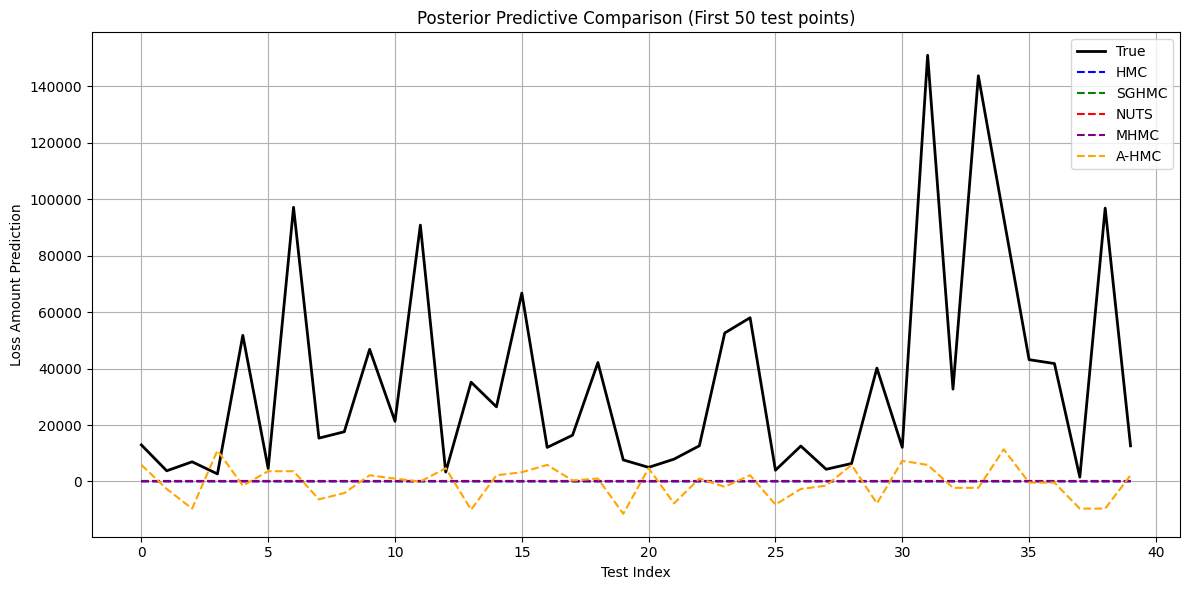

In [33]:
plt.figure(figsize=(12, 6))

plt.plot(y_test[:50], label="True", color="black", linewidth=2)
plt.plot(mean_hmc[:50], label="HMC", color="blue", linestyle="--")
plt.plot(mean_sghmc[:50], label="SGHMC", color="green", linestyle="--")
plt.plot(y_pred_nuts[:50], label="NUTS", color="red", linestyle="--")
plt.plot(y_pred_mhmc[:50], label="MHMC", color="purple", linestyle="--")
plt.plot(y_pred_ahmc[:50], label="A-HMC", color="orange", linestyle="--")

plt.title("Posterior Predictive Comparison (First 50 test points)")
plt.xlabel("Test Index")
plt.ylabel("Loss Amount Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
def s2hmc_leapfrog(theta, r, step_size, X, y):
    # Use fourth-order integrator constants
    c1 = 0.5153528374311229364
    c2 = -0.085782019412973646
    d1 = 0.1344961992774310892
    d2 = -0.2248198030794208058

    # 4th-order symplectic integrator
    def step(theta, r, c, d):
        r -= c * step_size * grad_log_posterior(theta, X, y)
        theta += d * step_size * r
        return theta, r

    theta, r = step(theta, r, c1, d1)
    theta, r = step(theta, r, c2, d2)
    theta, r = step(theta, r, c2, d1)
    theta, r = step(theta, r, c1, d1)

    return theta, r

In [35]:
def s2hmc_sampler(theta0, X, y, num_samples=5000, step_size=0.05, num_steps=20):
    D = len(theta0)
    samples = []
    theta = theta0.copy()

    for i in range(num_samples):
        r0 = np.random.randn(D)
        current_theta = theta.copy()
        current_r = r0.copy()

        # Simulate dynamics with shadow integrator
        theta_new, r_new = current_theta.copy(), current_r.copy()
        for _ in range(num_steps):
            theta_new, r_new = s2hmc_leapfrog(theta_new, r_new, step_size, X, y)

        # Compute energies
        current_U = -log_posterior(current_theta, X, y)
        current_K = 0.5 * np.sum(current_r ** 2)
        proposed_U = -log_posterior(theta_new, X, y)
        proposed_K = 0.5 * np.sum(r_new ** 2)

        accept_prob = np.exp(current_U - proposed_U + current_K - proposed_K)
        if np.random.rand() < accept_prob:
            theta = theta_new

        samples.append(theta.copy())
        if i % 50 == 0:
            print(f"S2HMC Sample {i}")
    return np.array(samples)

In [36]:
theta0 = np.zeros(X_demo.shape[1])
samples_s2hmc = s2hmc_sampler(theta0, X_demo, y_demo, num_samples=5000)

S2HMC Sample 0
S2HMC Sample 50
S2HMC Sample 100
S2HMC Sample 150
S2HMC Sample 200
S2HMC Sample 250


In [37]:
theta_s2hmc_mean = np.mean(samples_s2hmc, axis=0)
y_pred_s2hmc = X_test_demo @ theta_s2hmc_mean

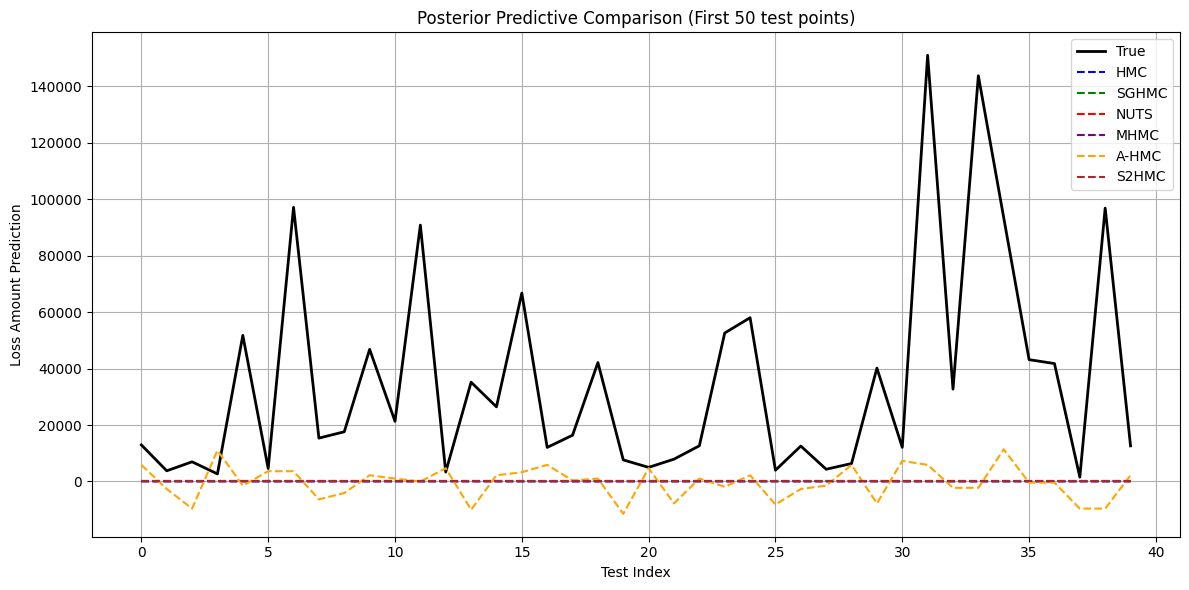

In [38]:
plt.figure(figsize=(12, 6))

plt.plot(y_test[:50], label="True", color="black", linewidth=2)
plt.plot(mean_hmc[:50], label="HMC", color="blue", linestyle="--")
plt.plot(mean_sghmc[:50], label="SGHMC", color="green", linestyle="--")
plt.plot(y_pred_nuts[:50], label="NUTS", color="red", linestyle="--")
plt.plot(y_pred_mhmc[:50], label="MHMC", color="purple", linestyle="--")
plt.plot(y_pred_ahmc[:50], label="A-HMC", color="orange", linestyle="--")
plt.plot(y_pred_s2hmc[:50], label="S2HMC", color="brown", linestyle="--")

plt.title("Posterior Predictive Comparison (First 50 test points)")
plt.xlabel("Test Index")
plt.ylabel("Loss Amount Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    y_true = np.where(y_true == 0, 1e-10, y_true)  # Replace zeros with a small value to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming y_test, mean_hmc, mean_sghmc, y_pred_nuts, y_pred_mhmc, y_pred_ahmc, y_pred_s2hmc are already defined

methods = {
    "HMC": mean_hmc,
    "SGHMC": mean_sghmc,
    "NUTS": y_pred_nuts,
    "MHMC": y_pred_mhmc,
    "A-HMC": y_pred_ahmc,
    "S2HMC": y_pred_s2hmc,
}

results = []
for method, preds in methods.items():
    # Handle NaN values in preds, but keep at least one element
    valid_preds = preds[~np.isnan(preds)]

    # If all predictions are NaN, skip this method and record NaN for all metrics
    if len(valid_preds) == 0:
        results.append([method, np.nan, np.nan, np.nan, np.nan])
        continue

    # Slice y_test only to the length of valid predictions
    y_test_subset = y_test[:len(valid_preds)]

    rmse = np.sqrt(mean_squared_error(y_test_subset, valid_preds))
    mae = mean_absolute_error(y_test_subset, valid_preds)
    mape = mean_absolute_percentage_error(y_test_subset, valid_preds)
    r2 = r2_score(y_test_subset, valid_preds)
    results.append([method, rmse, mae, mape, r2])

results_df = pd.DataFrame(results, columns=["Method", "RMSE", "MAE", "MAPE", "R2"])
results_df

,Method,RMSE,MAE,MAPE,R2
0,HMC,51782.271561,35351.867188,99.997144,-0.872973
1,SGHMC,NaN,NaN,NaN,NaN
2,NUTS,51782.173216,35352.000000,100.000000,-0.872966
3,MHMC,51782.173216,35352.000000,100.000000,-0.872966
4,A-HMC,51823.042947,36208.740410,128.605629,-0.875924
5,S2HMC,51782.173216,35352.000000,100.000000,-0.872966


In [40]:
# prompt: Code to evaluate operational efficiency of each variant

import numpy as np
import pandas as pd

# Assuming results_df is already created as in the original code

# Calculate the operational efficiency for each method
# Operational Efficiency = 1 - (Loss Amount Prediction Error / Maximum Possible Loss Amount)

# Find the maximum loss amount in the test set
max_loss = np.max(y_test)

# Calculate the prediction error for each method (e.g., using RMSE)
for index, row in results_df.iterrows():
    method = row["Method"]
    rmse = row["RMSE"]

    # Normalize the error and subtract from 1
    operational_efficiency = 1 - (rmse / max_loss)

    # Store the efficiency
    results_df.loc[index, "Operational Efficiency"] = operational_efficiency

results_df


,Method,RMSE,MAE,MAPE,R2,Operational Efficiency
0,HMC,51782.271561,35351.867188,99.997144,-0.872973,0.657096
1,SGHMC,NaN,NaN,NaN,NaN,NaN
2,NUTS,51782.173216,35352.000000,100.000000,-0.872966,0.657097
3,MHMC,51782.173216,35352.000000,100.000000,-0.872966,0.657097
4,A-HMC,51823.042947,36208.740410,128.605629,-0.875924,0.656826
5,S2HMC,51782.173216,35352.000000,100.000000,-0.872966,0.657097
